<a href="https://colab.research.google.com/github/fsilvino/INE5644-data-mining-projeto-final/blob/master/eda/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Inicialmente o carregamento havia sido feito mais simples:
# Depois fui incrementando com as descobertas feitas durante a exploração
df = pd.read_csv('../datasets/openDataSUS/INFLUD-21-09-2020.csv', delimiter=';')

d:\github\ine5644-data-mining-projeto-final\venv\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (15,60,62,63,64,92,94,108,117,121,123) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# número de linhas e colunas
df.shape

(754901, 154)

In [4]:
for i, name in enumerate(df.columns.values):
    if i in (15,60,62,63,64,92,94,108,117,121,123):
        print(str(i) + ' - ' + name + ': ')
        print('dtype: ', df[name].dtype)
        print('Valores: ', end='')
        print(df[name].unique())
        print()

15 - COD_IDADE: 
dtype:  object
Valores: [2008 3021 3080 3020 3004 3059 3067 3068 3054 3005 3024 3029 3019 3053
 3048 3056 3077 3051 3039 3014 3040 3072 3002 3028 3001 2009 3057 3032
 3027 3064 3025 3073 3043 2006 2002 2011 3036 3075 3060 3013 3003 3009
 3079 3017 2001 3052 3094 3050 3034 3031 3006 3038 3045 3083 1027 3049
 3030 3026 3085 3023 3062 3037 3087 3093 3033 3063 3042 3046 3082 3090
 3035 3061 1013 3055 3058 3078 3070 3066 3069 3086 3065 3074 3016 3076
 2003 3018 3041 1002 3071 3044 3081 3084 3047 3015 3091 3088 3008 3089
 1000 3095 1001 3096 3092 3100 3010 3097 3022 3007 2007 3011 3012 3098
 2004 3099 3107 1009 2010 1016 1021 3105 2005 2000 3102 1004 1011 1010
 1007 1028 1005 3103 3101 3104 1003 1015 1012 3138 1006 1026 1014 1025
 1008 3106 1017 3000 1019 1020 3108 3120 3109 3136 1023 1022 1018 1024
 3132 3111 3139 '3062' '3073' '3055' '3021' '3051' '3049' '3036' '3029'
 '3045' '3079' '3063' '3081' '3091' '3075' '3061' '3076' '3074' '3092'
 '3071' '3070' '3053' '3059' '3040'

In [5]:
pd.Series(df['PAC_COCBO'].unique().astype(str)).sort_values(key=lambda x: x.str.lower(), ascending=False).head(5).to_markdown(tablefmt='html')

,0
8,XXX
0,nan
353,992225
842,992210
659,992205


In [6]:
# Verificando quais são as colunas de data para converter para datetime
df.filter(regex='^DT_', axis=1).head(5)

,DT_NOTIFIC,DT_SIN_PRI,DT_NASC,DT_UT_DOSE,DT_VAC_MAE,DT_DOSEUNI,DT_1_DOSE,DT_2_DOSE,DT_ANTIVIR,DT_INTERNA,...,DT_PCR,DT_EVOLUCA,DT_ENCERRA,DT_DIGITA,DT_VGM,DT_RT_VGM,DT_TOMO,DT_RES_AN,DT_CO_SOR,DT_RES
0,08/01/2020,05/01/2020,13/05/2019,NaN,NaN,NaN,NaN,NaN,05/01/2020,05/01/2020,...,13/02/2020,25/01/2020,19/05/2020,09/01/2020,NaN,NaN,NaN,NaN,NaN,NaN
1,28/01/2020,22/01/2020,05/03/1998,NaN,NaN,NaN,NaN,NaN,24/01/2020,24/01/2020,...,04/02/2020,02/02/2020,18/02/2020,28/01/2020,NaN,NaN,NaN,NaN,NaN,NaN
2,13/01/2020,11/01/2020,31/07/1939,NaN,NaN,NaN,NaN,NaN,11/01/2020,11/01/2020,...,24/01/2020,20/01/2020,24/01/2020,24/01/2020,NaN,NaN,NaN,NaN,NaN,NaN
3,18/02/2020,12/02/2020,25/10/1999,NaN,NaN,NaN,NaN,NaN,19/02/2020,12/02/2020,...,NaN,NaN,NaN,21/02/2020,NaN,NaN,NaN,NaN,NaN,NaN
4,19/02/2020,14/02/2020,17/01/2016,NaN,NaN,NaN,NaN,NaN,19/02/2020,18/02/2020,...,04/03/2020,23/02/2020,12/03/2020,21/02/2020,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Indentifiquei que:
#    - As colunas que começam com DT_ são do tipo data e estão no formato dd/mm/aaaa
#    - As colunas 'FLUASU_OUT', 'FLUBLI_OUT', 'CLASSI_OUT', 'LO_PS_VGM', 'OUT_ANIM' são do tipo string
#    - A coluna 'PAC_COCBO' possui um valor inválido 'XXX', então estou convertendo para int e os valores inválidos estão setados para NA
#    - A coluna 'COD_IDADE' possui um valor inválido '20-1', então também estou convertendo para int e os valores inválidos setados para NA
#    - Várias colunas utilizam o código 9 para Ignorado, ou seja, não se sabe o valor pois não foi informado (serão tratados como NA)
to_date_parser = lambda x: pd.to_datetime(x, format='%d/%m/%Y', errors='coerce')
to_numeric_parser = lambda x: pd.to_numeric(x, errors='coerce')

# lendo o dataset
df = pd.read_csv('../datasets/openDataSUS/INFLUD-21-09-2020.csv', delimiter=';',
                 date_parser=to_date_parser,
                 parse_dates=['DT_NOTIFIC', 'DT_SIN_PRI', 'DT_NASC', 'DT_UT_DOSE', 'DT_VAC_MAE',
                              'DT_DOSEUNI', 'DT_1_DOSE', 'DT_2_DOSE', 'DT_ANTIVIR', 'DT_INTERNA',
                              'DT_ENTUTI', 'DT_SAIDUTI', 'DT_RAIOX', 'DT_COLETA', 'DT_PCR',
                              'DT_EVOLUCA', 'DT_ENCERRA', 'DT_DIGITA', 'DT_VGM', 'DT_RT_VGM',
                              'DT_TOMO', 'DT_RES_AN', 'DT_CO_SOR', 'DT_RES'],
                 na_values={'CS_SEXO': '9', 'CS_GESTANT': '9', 'CS_RACA': '9', 'CS_ESCOL_N': '9', 'CS_ZONA': '9', 'HISTO_VGM': '9', 'SURTO_SG': '9', 'NOSOCOMIAL': '9', 'AVE_SUINO': '9',
                            'FEBRE': '9', 'TOSSE': '9', 'GARGANTA': '9', 'DISPNEIA': '9', 'DESC_RESP': '9', 'SATURACAO': '9', 'DIARREIA': '9', 'VOMITO': '9', 'DOR_ABD': '9', 'FADIGA': '9',
                            'PERD_OLFT': '9', 'PERD_PALA': '9', 'OUTRO_SIN': '9', 'FATOR_RISC': '9', 'PUERPERA': '9', 'CARDIOPATI': '9', 'HEMATOLOGI': '9', 'SIND_DOWN': '9', 'HEPATICA': '9',
                            'ASMA': '9', 'DIABETES': '9', 'NEUROLOGIC': '9', 'PNEUMOPATI': '9', 'IMUNODEPRE': '9', 'RENAL': '9', 'OBESIDADE': '9', 'OUT_MORBI': '9', 'VACINA': '9',
                            'MAE_VAC': '9', 'M_AMAMENTA': '9', 'ANTIVIRAL': '9', 'HOSPITAL': '9', 'UTI': '9', 'SUPORT_VEN': '9', 'RAIOX_RES': '9', 'TOMO_RES': '9', 'AMOSTRA': '9',
                            'TP_AMOSTRA': '9', 'RES_AN': '9', 'POS_AN_FLU': '9', 'POS_AN_OUT': '9', 'PCR_RESUL': '9', 'POS_PCRFLU': '9', 'POS_PCROUT': '9', 'TP_AM_SOR': '9', 'EVOLUCAO': '9'},
                 converters={'PAC_COCBO': to_numeric_parser, 'COD_IDADE': to_numeric_parser},
                 dtype={'FLUASU_OUT': str, 'FLUBLI_OUT': str, 'CLASSI_OUT': str, 'LO_PS_VGM': str, 'OUT_ANIM': str})

In [8]:
# Calculando valores faltantes para cada coluna
total = len(df)
faltantes = df.apply(lambda x: sum(x.isnull()) / total, axis=0)

In [9]:
# Mostrando a quantidade de valores faltantes por coluna
faltantes.loc[faltantes > 0.9].sort_values(ascending=False).to_markdown(tablefmt="html")

,0
AN_PARA2,0.999999
FLUBLI_OUT,0.999997
AN_PARA3,0.999995
FLUASU_OUT,0.999993
AN_PARA1,0.99998
PCR_PARA2,0.999974
PCR_PARA4,0.99997
AN_ADENO,0.999963
PCR_BOCA,0.999958
PCR_PARA1,0.999899


In [10]:
# verificando quantos resultados de teste de COVID-19 estão preenchidos (depois verificou-se que existem mais colunas com este dado)
df['RES_IGM'].count()

51742

In [11]:
df.head()

,DT_NOTIFIC,SEM_NOT,DT_SIN_PRI,SEM_PRI,SG_UF_NOT,ID_REGIONA,CO_REGIONA,ID_MUNICIP,CO_MUN_NOT,ID_UNIDADE,...,DS_AN_OUT,TP_AM_SOR,SOR_OUT,DT_CO_SOR,TP_SOR,OUT_SOR,DT_RES,RES_IGG,RES_IGM,RES_IGA
0,2020-01-08,2,2020-01-05,2,SP,GVE XVII CAMPINAS,1342.0,CAMPINAS,350950,HOSPITAL E MATERNIDADE CELSO PIERRO,...,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaN
1,2020-01-28,5,2020-01-22,4,PR,02RS METROPOLITANA,1356.0,CURITIBA,410690,COMPLEXO HOSPITAL DE CLINICAS,...,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaN
2,2020-01-13,3,2020-01-11,2,PR,16RS APUCARANA,1370.0,JANDAIA DO SUL,411210,CASA DE SAUDE E MAT N SENHORA FATIMA,...,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaN
3,2020-02-18,8,2020-02-12,7,MA,REGI0NAL DE SAUDE METROPOLITANA,1430.0,SAO LUIS,211130,SOCORRAO II,...,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaN
4,2020-02-19,8,2020-02-14,7,PR,15RS MARINGA,1369.0,MARINGA,411520,HOSPITAL MUNICIPAL DE MARINGA THELMA VILLANOVA...,...,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaN


In [12]:
print("min:", df['DT_NOTIFIC'].min())
print("max:", df['DT_NOTIFIC'].max())

min: 2019-12-29 00:00:00
max: 2020-09-21 00:00:00


In [13]:
# Existe um valor estranho (que parece incorreto: 20-1) que impede a conversão para inteiro. Poderíamos remover ou tratar este valor,
# porém como não sabemos para que serve este campo e não encontramos ele no dicionário de dados, estamos descartando-o.
# Além disso, outras colunas que no nosso entendimento não serão importantes para o objetivo e escopo deste projeto estão sendo descartadas,
# assim como colunas que possuem mais de 90% de seus registros com valor em branco (faltante)
df = df.drop(['COD_IDADE', 'SEM_NOT', 'OBES_IMC', 'DT_UT_DOSE', 'MAE_VAC', 'DT_VAC_MAE',
       'M_AMAMENTA', 'DT_DOSEUNI', 'DT_1_DOSE', 'DT_2_DOSE', 'DT_ANTIVIR',
       'DT_RAIOX', 'DT_COLETA', 'DT_PCR', 'POS_PCRFLU', 'TP_FLU_PCR',
       'PCR_FLUASU', 'FLUASU_OUT', 'PCR_FLUBLI', 'FLUBLI_OUT',
       'POS_PCROUT', 'PCR_VSR', 'PCR_PARA1', 'PCR_PARA2', 'PCR_PARA3',
       'PCR_PARA4', 'PCR_ADENO', 'PCR_METAP', 'PCR_BOCA', 'PCR_RINO',
       'PCR_OUTRO', 'DS_PCR_OUT', 'DT_TOMO', 'TP_TES_AN', 'DT_RES_AN',
       'RES_AN', 'POS_AN_FLU', 'TP_FLU_AN', 'POS_AN_OUT', 'AN_VSR',
       'AN_PARA1', 'AN_PARA2', 'AN_PARA3', 'AN_ADENO', 'AN_OUTRO',
       'DS_AN_OUT', 'OUT_ANIM', 'LO_PS_VGM', 'DT_VGM', 'DT_RT_VGM',
       'PAIS_VGM', 'CO_PS_VGM', 'CS_ETINIA', 'OUT_SOR', 'SOR_OUT',
       'OUT_ANTIV', 'TOMO_OUT', 'PAC_COCBO', 'PAC_DSCBO', 'DT_CO_SOR',
       'DT_RES', 'TP_AM_SOR', 'TP_SOR'], axis=1)

In [14]:
df.shape

(754901, 91)

In [15]:
df.describe()

,SEM_PRI,CO_REGIONA,CO_MUN_NOT,CO_UNI_NOT,NU_IDADE_N,TP_IDADE,CS_GESTANT,CS_RACA,CS_ESCOL_N,CO_PAIS,...,PCR_SARS2,DOR_ABD,FADIGA,PERD_OLFT,PERD_PALA,TOMO_RES,AN_SARS2,RES_IGG,RES_IGM,RES_IGA
count,754901.000000,659567.000000,754901.000000,7.549010e+05,754901.000000,754901.000000,716800.000000,566560.000000,280009.000000,754901.000000,...,299142.0,191627.000000,195141.000000,191246.000000,190773.000000,129418.000000,9347.0,50044.000000,51742.000000,32246.000000
mean,24.670170,1572.204149,333623.722345,3.341047e+06,56.162698,2.975862,5.636761,2.456755,2.336878,1.008218,...,1.0,1.926065,1.787159,1.897075,1.895006,3.234326,1.0,2.255096,2.090487,4.174192
std,6.963992,702.059583,91586.426839,2.439110e+06,22.622275,0.175956,0.579514,1.450970,1.418328,0.923995,...,0.0,0.261666,0.409317,0.303862,0.306546,2.307650,0.0,1.556260,1.478412,1.475100
min,1.000000,1331.000000,110001.000000,1.900000e+01,-1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000
25%,19.000000,1342.000000,280290.000000,2.081164e+06,42.000000,3.000000,5.000000,1.000000,1.000000,1.000000,...,1.0,2.000000,2.000000,2.000000,2.000000,1.000000,1.0,1.000000,1.000000,4.000000
50%,25.000000,1430.000000,350950.000000,2.481286e+06,59.000000,3.000000,6.000000,2.000000,2.000000,1.000000,...,1.0,2.000000,2.000000,2.000000,2.000000,2.000000,1.0,2.000000,1.000000,4.000000
75%,30.000000,1519.000000,355030.000000,4.028155e+06,73.000000,3.000000,6.000000,4.000000,3.000000,1.000000,...,1.0,2.000000,2.000000,2.000000,2.000000,6.000000,1.0,4.000000,4.000000,4.000000
max,39.000000,6256.000000,530010.000000,9.997091e+06,148.000000,3.000000,6.000000,5.000000,5.000000,193.000000,...,1.0,2.000000,2.000000,2.000000,2.000000,6.000000,1.0,9.000000,9.000000,9.000000


In [16]:
pd.Series(df.columns.values).to_markdown(tablefmt="html")

,0
0,DT_NOTIFIC
1,DT_SIN_PRI
2,SEM_PRI
3,SG_UF_NOT
4,ID_REGIONA
5,CO_REGIONA
6,ID_MUNICIP
7,CO_MUN_NOT
8,ID_UNIDADE
9,CO_UNI_NOT


array([[<AxesSubplot:title={'center':'CLASSI_FIN'}>]], dtype=object)

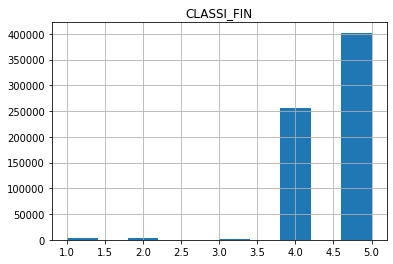

In [17]:
# Aqui buscou-se verificar a quantidade por classificação final do caso
#    1-SRAG por influenza
#    2-SRAG por outro vírus respiratório
#    3-SRAG por outro agente etiológico, qual:
#    4-SRAG não especificado
#    5-SRAG por COVID-19
df[['CLASSI_FIN']].hist()

In [18]:
df[['CLASSI_FIN', 'FEBRE', 'TOSSE', 'GARGANTA', 'DISPNEIA', 'DESC_RESP', 'SATURACAO', 'DIARREIA', 'VOMITO', 'OUTRO_SIN', 'OUTRO_DES', 'PUERPERA', 'FATOR_RISC', 'CARDIOPATI', 'HEMATOLOGI', 'SIND_DOWN', 'HEPATICA', 'ASMA', 'DIABETES', 'NEUROLOGIC', 'PNEUMOPATI', 'IMUNODEPRE', 'RENAL', 'OBESIDADE', 'OUT_MORBI']].corr()

,CLASSI_FIN,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,DIARREIA,VOMITO,OUTRO_SIN,...,SIND_DOWN,HEPATICA,ASMA,DIABETES,NEUROLOGIC,PNEUMOPATI,IMUNODEPRE,RENAL,OBESIDADE,OUT_MORBI
CLASSI_FIN,1.000000,-0.091720,-0.051887,-0.040297,-0.017232,0.018993,-0.046826,-0.064393,0.028666,-0.092075,...,0.018751,0.017415,0.096828,-0.138384,0.054933,0.096137,0.059158,-0.003277,-0.099300,-0.024598
FEBRE,-0.091720,1.000000,0.278877,0.210732,0.084702,0.087433,0.069952,0.122487,0.067169,0.060675,...,0.017716,0.002296,0.012538,0.074487,0.038399,-0.014129,0.038003,0.015118,0.056953,0.046670
TOSSE,-0.051887,0.278877,1.000000,0.209195,0.177630,0.144500,0.108775,0.070908,0.024591,0.005243,...,0.006495,-0.005632,0.084571,0.075938,-0.019669,0.048323,-0.001182,-0.008434,0.058451,0.018617
GARGANTA,-0.040297,0.210732,0.209195,1.000000,0.059315,0.107189,0.009295,0.137536,0.087367,0.017629,...,0.008537,0.008024,0.055369,0.050007,-0.024244,-0.007171,0.011918,-0.004221,0.046067,0.004516
DISPNEIA,-0.017232,0.084702,0.177630,0.059315,1.000000,0.395837,0.379323,0.013644,-0.001982,-0.064544,...,0.002770,0.010356,0.080972,0.082256,0.017919,0.102569,0.004604,0.031673,0.070475,0.031876
DESC_RESP,0.018993,0.087433,0.144500,0.107189,0.395837,1.000000,0.415935,0.037742,0.032908,-0.096289,...,0.014615,0.014713,0.076884,0.072579,0.044394,0.087979,0.000599,0.030808,0.061349,0.013064
SATURACAO,-0.046826,0.069952,0.108775,0.009295,0.379323,0.415935,1.000000,0.023487,0.017935,-0.049013,...,0.013489,0.010019,0.036919,0.104003,0.077144,0.101990,0.002837,0.036991,0.078080,0.033643
DIARREIA,-0.064393,0.122487,0.070908,0.137536,0.013644,0.037742,0.023487,1.000000,0.304871,0.103104,...,0.008825,0.020674,0.011170,0.050276,-0.003851,-0.014987,0.037405,0.031209,0.051176,0.046438
VOMITO,0.028666,0.067169,0.024591,0.087367,-0.001982,0.032908,0.017935,0.304871,1.000000,0.093046,...,0.012262,0.030083,0.029663,0.039908,0.022780,-0.008629,0.030790,0.039152,0.013133,0.039608
OUTRO_SIN,-0.092075,0.060675,0.005243,0.017629,-0.064544,-0.096289,-0.049013,0.103104,0.093046,1.000000,...,-0.000073,0.019078,0.008033,0.080257,0.019929,-0.005518,0.028987,0.026855,0.075166,0.191437
